# Pre-processing and Creating Training Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_cleaned = pd.read_csv(r'C:\Users\ashle\OneDrive\Documents\GitHub\Capstone-2\outliers_removed.csv', index_col=0)

In [3]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 1 to 390
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      379 non-null    int64  
 1   Glucose          379 non-null    int64  
 2   HDL Chol         379 non-null    int64  
 3   Chol/HDL ratio   379 non-null    float64
 4   Age              379 non-null    int64  
 5   Height           379 non-null    int64  
 6   Weight           379 non-null    int64  
 7   BMI              379 non-null    float64
 8   Systolic BP      379 non-null    int64  
 9   Diastolic BP     379 non-null    int64  
 10  waist            379 non-null    int64  
 11  hip              379 non-null    int64  
 12  Waist/hip ratio  379 non-null    float64
 13  Gender_female    379 non-null    int64  
 14  Gender_male      379 non-null    int64  
 15  Diabetes         379 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 50.3 KB


In [4]:
diabetes_cleaned = pd.DataFrame(diabetes_cleaned.values.repeat(5, axis=0), columns=diabetes_cleaned.columns)

In [5]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cholesterol      1895 non-null   float64
 1   Glucose          1895 non-null   float64
 2   HDL Chol         1895 non-null   float64
 3   Chol/HDL ratio   1895 non-null   float64
 4   Age              1895 non-null   float64
 5   Height           1895 non-null   float64
 6   Weight           1895 non-null   float64
 7   BMI              1895 non-null   float64
 8   Systolic BP      1895 non-null   float64
 9   Diastolic BP     1895 non-null   float64
 10  waist            1895 non-null   float64
 11  hip              1895 non-null   float64
 12  Waist/hip ratio  1895 non-null   float64
 13  Gender_female    1895 non-null   float64
 14  Gender_male      1895 non-null   float64
 15  Diabetes         1895 non-null   float64
dtypes: float64(16)
memory usage: 237.0 KB


### Create dummy features:

In [6]:
diabetes_cleaned['Diabetes'].unique()

array([0., 1.])

In [7]:
diabetes_cleaned['Diabetes'].replace('Diabetes', 1, inplace=True)
diabetes_cleaned['Diabetes'].replace('No diabetes', 0, inplace=True)

In [8]:
diabetes_cleaned.head()

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Gender_female,Gender_male,Diabetes
0,193.0,77.0,49.0,3.9,19.0,61.0,119.0,22.5,118.0,70.0,32.0,38.0,0.84,1.0,0.0,0.0
1,193.0,77.0,49.0,3.9,19.0,61.0,119.0,22.5,118.0,70.0,32.0,38.0,0.84,1.0,0.0,0.0
2,193.0,77.0,49.0,3.9,19.0,61.0,119.0,22.5,118.0,70.0,32.0,38.0,0.84,1.0,0.0,0.0
3,193.0,77.0,49.0,3.9,19.0,61.0,119.0,22.5,118.0,70.0,32.0,38.0,0.84,1.0,0.0,0.0
4,193.0,77.0,49.0,3.9,19.0,61.0,119.0,22.5,118.0,70.0,32.0,38.0,0.84,1.0,0.0,0.0


In [9]:
diabetes_cleaned = pd.get_dummies(diabetes_cleaned)

In [10]:
class_counts = diabetes_cleaned['Diabetes'].value_counts()
class_counts

0.0    1610
1.0     285
Name: Diabetes, dtype: int64

In [11]:
class_percentages = pd.Series([(x / diabetes_cleaned.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    84.960422
1    15.039578
dtype: float64

### Create train and test data:

In [12]:
y=diabetes_cleaned.pop('Diabetes')
X=diabetes_cleaned

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 42)

### Standardize the data:

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Modeling

### Model 1: Decision Tree Entropy Model

In [31]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth= 5, random_state=42)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

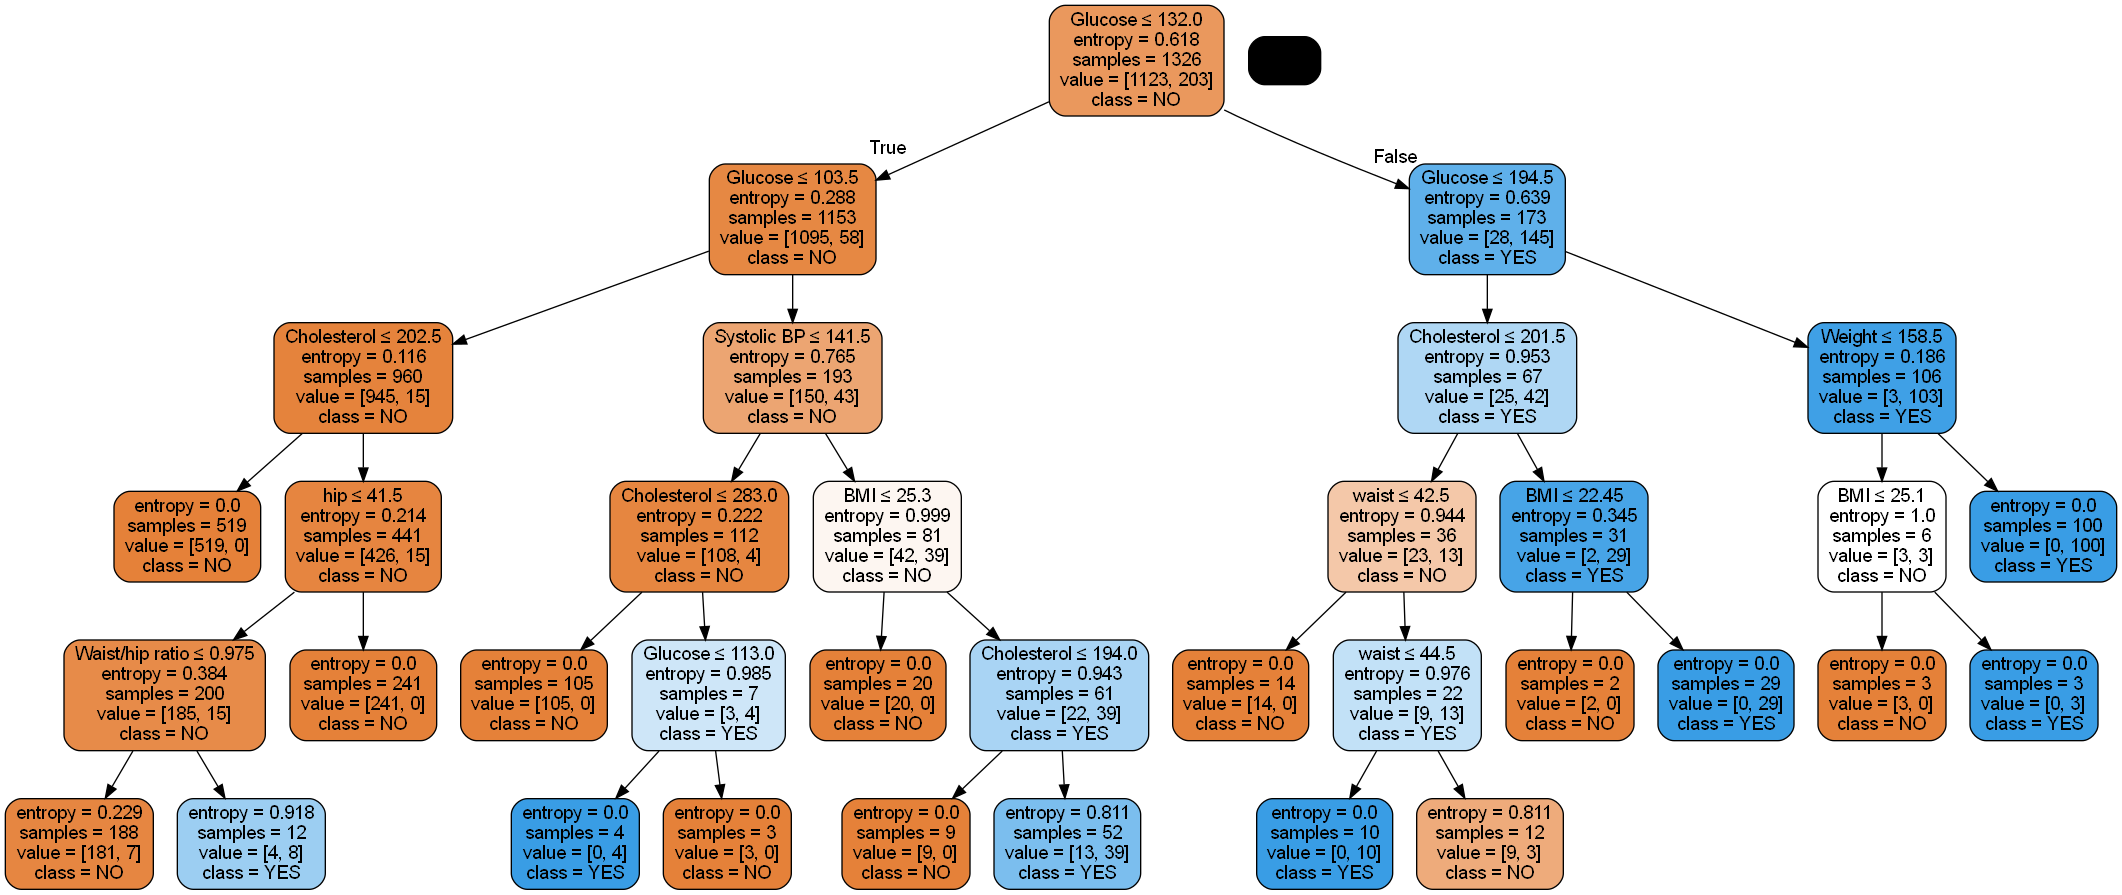

In [32]:
dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
from sklearn.metrics import confusion_matrix

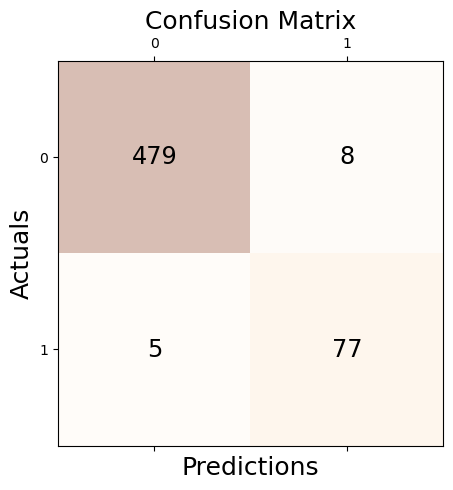

In [34]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Model 1 Stats:

In [36]:
print("Model Entropy - max depth of 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Model Entropy - max depth of 5
Accuracy: 0.9771528998242531
Precision: 0.9058823529411765
Recall: 0.9390243902439024
F1 Score: 0.9221556886227545


### Model 2: Logistic Regression Model

In [20]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred = pd.Series(y_pred)
classifier

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

### Model 2 Stats:

In [21]:
print("Logistic Regression Model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Logistic Regression Model
Accuracy: 0.9261862917398945
Precision: 0.8571428571428571
Recall: 0.5853658536585366
F1 Score: 0.6956521739130435


### Model 3:Gradient Boosting Model

In [22]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred = pd.Series(y_pred)
gb

GradientBoostingClassifier()

### Model 3 Stats

In [23]:
print("Gradient Boosting Model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Gradient Boosting Model
Accuracy: 0.9929701230228472
Precision: 1.0
Recall: 0.9512195121951219
F1 Score: 0.975


### Parameter tunning:

In [37]:
params = {'learning_rate': [0.01, 0.1, 0.05, 0.25, 0.5, 1], 'n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200]}

In [38]:
gridCV = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=10)
gridCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.25, 0.5, 1],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]})

In [39]:
gridCV.best_params_

{'learning_rate': 0.25, 'n_estimators': 64}

In [40]:
gridCV.best_score_

0.997738664843928

## Best Model:

GridSearchCV tells us that the gradient boosting model with learning rate = 0.25 and n_estimators = 64 would be the best model.

In [51]:
best_model = GradientBoostingClassifier(learning_rate = 0.25, n_estimators = 64)
best_model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred = pd.Series(y_pred)
best_model

GradientBoostingClassifier(learning_rate=0.25, n_estimators=64)

In [52]:
print("Gradient Boosting model with learning_rate = 0.25 and n_estimators = 64")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))
print("F1 Score:", metrics.f1_score(y_test,y_pred))

Gradient Boosting model with learning_rate = 0.25 and n_estimators = 64
Accuracy: 0.9261862917398945
Precision: 0.8571428571428571
Recall: 0.5853658536585366
F1 Score: 0.6956521739130435


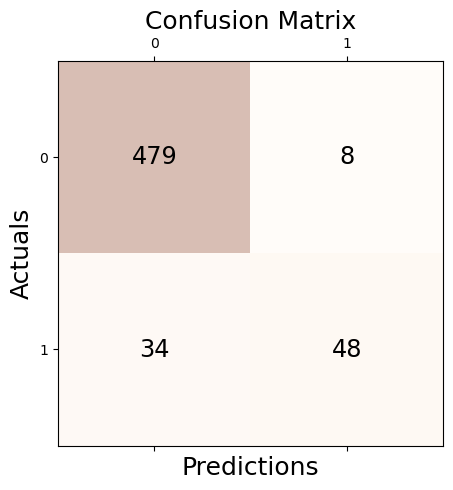

In [53]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()